<body>
    <section style="border:1px solid RoyalBlue;">
        <section style="background-color:White; font-family:Georgia;text-align:center">
            <h1 style="color:RoyalBlue">Introduction to Data Science</h1>
            <h2 style="color:RoyalBlue">Dr.	Casey Kennington</h1>
            <h2 style="font-family:Courier; text-align:center;">CS-533</h2>
            <br>
            <h2 style="font-family:Garamond;">Gerardo Caracas Uribe</h2>
            <h2 style="font-family:Garamond;">Student ID: 114104708</h2>
            <h2 style="font-family:Courier;">Assignment 2, Data Analysis </h2>
            <hr/>
        </section>
    </section>
</body>

In [1]:
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd
import numpy as np

In [90]:
artists = pd.read_csv("./artists.dat",delimiter="\t")
tags = pd.read_csv("./tags.dat",delimiter="\t",encoding = "ISO-8859-1")
user_artists = pd.read_csv("./user_artists.dat",delimiter="\t")
user_friends = pd.read_csv("./user_friends.dat",delimiter="\t")
user_tagged_timestamp = pd.read_csv("./user_taggedartists-timestamps.dat",delimiter="\t")
user_taggedartists = pd.read_csv("./user_taggedartists.dat",delimiter="\t")

In [4]:
artists[0:1]

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg


In [5]:
tags[0:1]

,tagID,tagValue
0,1,metal


In [6]:
user_artists[0:1]

,userID,artistID,weight
0,2,51,13883


In [7]:
user_friends[0:1]

,userID,friendID
0,2,275


In [8]:
user_tagged_timestamp[0:1]

,userID,artistID,tagID,timestamp
0,2,52,13,1238536800000


In [9]:
user_taggedartists[0:1]

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009


<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h1 style="font-family:Garamond; color:red">Answer the following questions</h1>
</h3>
        <hr/>
    </section>
</body>

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Question 1</h2>
        <h3 style="font-family:Garamond;">Plot the distribution of play counts per artist</h3>
        <hr/>
    </section>
</body>

Text(0,0.5,'Number of plays')

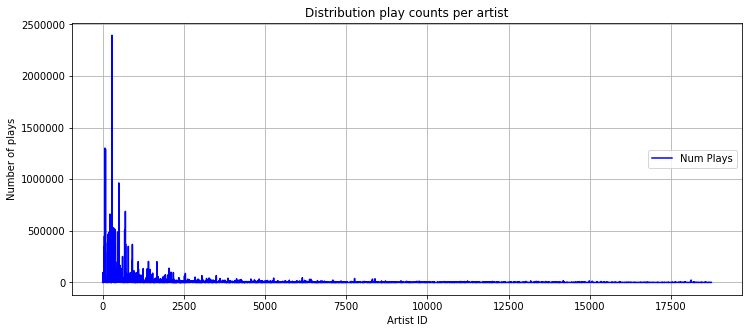

In [76]:
data =user_artists.groupby(['artistID'])[["weight"]].sum()
data=data.reset_index()
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(data[['artistID']], data[['weight']], 'b-', linewidth=1.5, label='Num Plays')
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Distribution play counts per artist')
ax.set_xlabel('Artist ID')
ax.set_ylabel('Number of plays')

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Question 2</h2>
        <h3 style="font-family:Garamond;">Plot the distribution of unique users playing each artist</h3>
        <hr/>
    </section>
</body>

Text(0,0.5,'Unique users playing each artist')

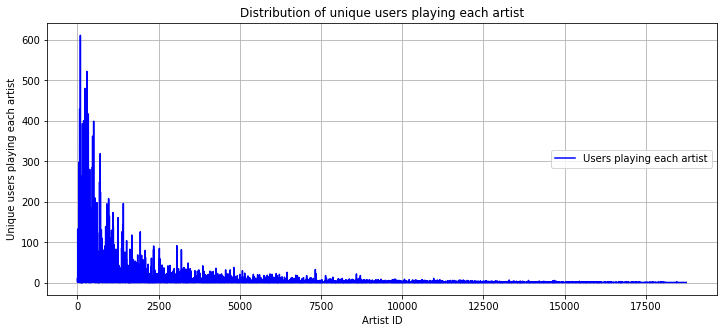

In [78]:
data = user_artists.groupby(['artistID'])[["userID"]]
data = data.count()
data = data.reset_index()
x = list(data['artistID'])
y = list(data['userID'])
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(x,y, 'b-', linewidth=1.5, label='Users playing each artist')
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Distribution of unique users playing each artist')
ax.set_xlabel('Artist ID')
ax.set_ylabel('Unique users playing each artist')

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Question 3</h2>
        <h3 style="font-family:Garamond;">Plot the distribution of play counts per user</h3>
        <hr/>
    </section>
</body>

Text(0,0.5,'Play counts per user')

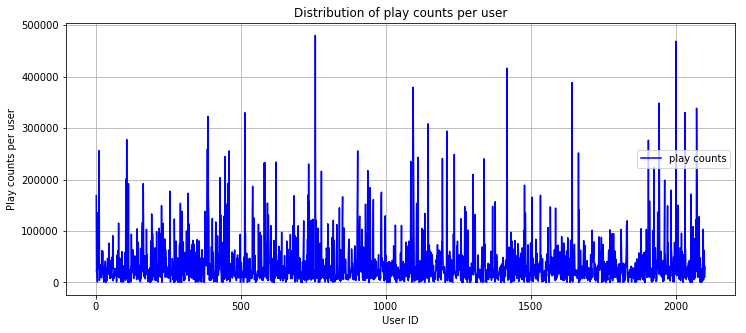

In [111]:
data =user_artists.groupby(['userID'])[["weight"]].sum()
data = data.reset_index()
x = list(data['userID'])
y = list(data['weight'])
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(x,y, 'b-', linewidth=1.5, label='play counts')
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Distribution of play counts per user')
ax.set_xlabel('User ID')
ax.set_ylabel('Play counts per user')

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Question 4</h2>
        <h3 style="font-family:Garamond;">Plot the distribution of unique artists per user</h3>
        <hr/>
    </section>
</body>

Text(0,0.5,'Number of unique artists')

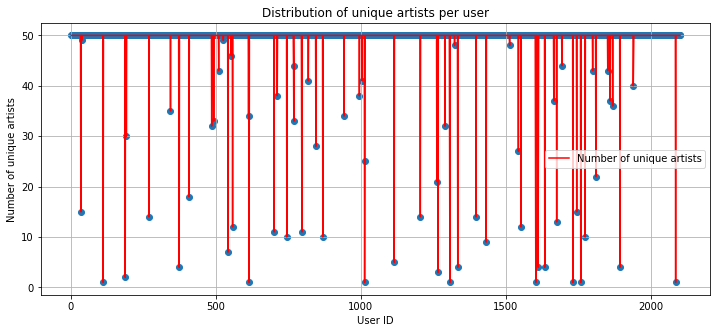

In [141]:
data = user_artists.groupby(['userID'])[["artistID"]].count()
data = data.reset_index()
x = list(data['userID'])
y = list(data['artistID'])
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(x=x,y=y)
ax.plot(x,y, 'r-', linewidth=1.5, label='Number of unique artists')
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Distribution of unique artists per user')
ax.set_xlabel('User ID')
ax.set_ylabel('Number of unique artists') 

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Question 5</h2>
        <h3 style="font-family:Garamond;">What is the mean artists-per-user? Users-per-artist? Plays per user/artist pair?</h3>
        <hr/>
    </section>
</body>

In [165]:
mapu=(user_artists.groupby(['userID'])[["artistID"]].count().mean())[0]
print("Mean artist per users = ", mapu)
mupa = user_artists.groupby(['artistID'])[["userID"]].count().mean()[0]
print("Mean users per artist = ", mupa)
ppuap = user_artists['weight'].mean()
print("Mean plays per user/artist pair = ",ppuap)

Mean artist per users =  49.06659619450317
Mean users per artist =  5.265086206896552
Mean plays per user/artist pair =  745.2439300256372


<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Question 6</h2>
        <h3 style="font-family:Garamond;">What are the 10 artists with the most plays?</h3>
        <hr/>
    </section>
</body>

In [223]:
a = artists
ua = user_artists
m=s.merge(a, left_on='artistID', right_on='id', how='outer')
ua.sort_values(ascending=False, by='weight')
m = m[0:10]
[print("#",i[0]," [",i[1]['name'],"] = ",i[1]['weight']," plays") for i in m.iterrows()]

# 0  [ Duran Duran ] =  13883.0  plays
# 1  [ Morcheeba ] =  11690.0  plays
# 2  [ Air ] =  11351.0  plays
# 3  [ Hooverphonic ] =  10300.0  plays
# 4  [ Kylie Minogue ] =  8983.0  plays
# 5  [ Daft Punk ] =  6152.0  plays
# 6  [ Thievery Corporation ] =  5955.0  plays
# 7  [ Goldfrapp ] =  4616.0  plays
# 8  [ New Order ] =  4337.0  plays
# 9  [ Matt Bianco ] =  4147.0  plays


[None, None, None, None, None, None, None, None, None, None]

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Question 6</h2>
        <h3 style="font-family:Garamond;">What are the 10 artists with the most unique playing users?
</h3>
        <hr/>
    </section>
</body>

In [239]:
data = user_artists.groupby(['artistID'])[["userID"]]
data = data.count()
data.sort_values(ascending=False, by='userID', inplace=True)
data.reset_index(inplace=True)
a = artists
m=data.merge(a, left_on='artistID', right_on='id', how='outer')
m=m[0:10]
[print("#",i[0]," [",i[1]['name'],"] = ",i[1]['userID']," unique players") for i in m.iterrows()]


# 0  [ Lady Gaga ] =  611  unique players
# 1  [ Britney Spears ] =  522  unique players
# 2  [ Rihanna ] =  484  unique players
# 3  [ The Beatles ] =  480  unique players
# 4  [ Katy Perry ] =  473  unique players
# 5  [ Madonna ] =  429  unique players
# 6  [ Avril Lavigne ] =  417  unique players
# 7  [ Christina Aguilera ] =  407  unique players
# 8  [ Muse ] =  400  unique players
# 9  [ Paramore ] =  399  unique players


[None, None, None, None, None, None, None, None, None, None]

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h1 style="font-family:Garamond; color:red">Plotting a Regression Line</h1>
</h3>
        <hr/>
    </section>
</body>

In [ ]:
You will perform regression where x is the count of
friends a user has (i.e., user_friends.dat), and y
is the count of artists a user has tagged (i.e., user_taggedartists)

In [268]:
data = user_taggedartists.groupby(['userID'])[["artistID"]].count()
data2 = user_friends.groupby(['userID'])[["friendID"]].count()
m=data.merge(data2, left_on='userID', right_on='userID', how='outer')
df=m.rename(index=str, columns={"artistID": "taggedArtists", "friendID": "countOfFriends"})

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:blue">The following entries are following a demo from page</h2>
        <h6>https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606</h6>
        <hr/>
    </section>
</body>

In [271]:
import seaborn as sns

D:\sw\anaconda\envs\fastai\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


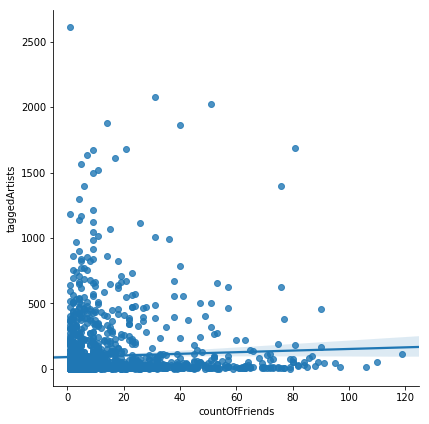

In [285]:
sns.pairplot(df, x_vars="countOfFriends", y_vars="taggedArtists", kind="reg",size=6)

In [291]:
feature_cols=['countOfFriends']
X = df[feature_cols]
y = df['taggedArtists']

In [341]:
# Import SK Learn train test split
from sklearn.cross_validation import train_test_split

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Assign variables to caputre train test split output
# Import SK Learn linear regression
from sklearn.linear_model import LinearRegression

# Instantiate
linreg = LinearRegression()

# Fit model to train data i.e) Learn coefficients
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [343]:
# Print y-intercepts
print(linreg.intercept_)

# Print the beta coefficients in same order as passed
print(linreg.coef_)

# Zip can pair feature names and coefficients together
zip(feature_cols, linreg.coef_)

87.17493515584836
[0.87346787]


In [345]:
y_pred = linreg.predict(X_test)

In [347]:
# Import metrics library
from sklearn import metrics

# Print results of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

121.25057889041061
50474.67366223612
224.6656931136486


In [351]:
m=linreg.coef_[0]
b=linreg.intercept_
x=[]
ypred=[]
yy=[]
for d in X_test.iterrows():
    xo=d[1]["countOfFriends"]
    x.append(xo)
    ypred.append(m*xo+b)
for d in y_test:
    yy.append(d)


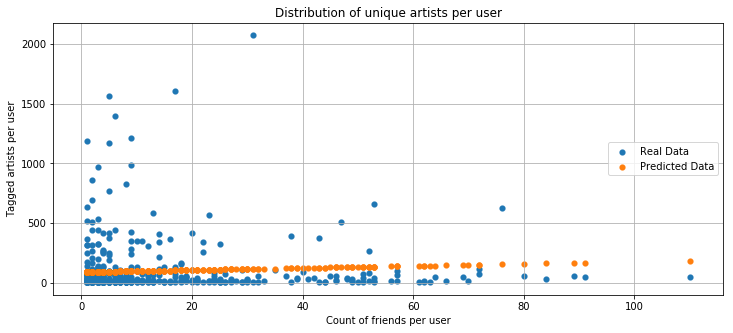

In [366]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.scatter(x,yy,linewidth=0.15, label='Real Data')
plt.scatter(x, ypred,linewidth=0.15, label='Predicted Data')
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Distribution of unique artists per user')
ax.set_xlabel('Count of friends per user')
ax.set_ylabel('Tagged artists per user') 
plt.show()

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Question 7</h2>
        <h3 style="font-family:Garamond;">What is the correlation between x and y</h3>
        <hr/>
    </section>
</body>

In [369]:
df.corr(method='pearson')

,taggedArtists,countOfFriends
taggedArtists,1.000000,0.047646
countOfFriends,0.047646,1.000000


<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Question 8</h2>
        <h3 style="font-family:Garamond;">What are the coefficients of the regression</h3>
        <hr/>
    </section>
</body>

In [370]:
print("m or beta_1 = ",linreg.coef_[0])
print("b or betha_0 or intercept in Y = ", linreg.intercept_)

m or beta_1 =  0.8734678728433535
b or betha_0 or intercept in Y =  87.17493515584836


<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond; color:solid #229954">Question 9</h2>
        <h3 style="font-family:Garamond;">What does these values tells you about the relationship between the x and y values</h3>
        <hr/>
    </section>
</body>

Correlation: Via the Pearson correlation coefficient, we can see that the correlation is very low, which we can say there is no correlation. 
We can say a variable A has a correlation with B if the pearson correlation coefficient is 0.5 or bigger.

Errors:
The Mean absolute error is not near 0, and the MSE is very high, which tells me that a lot of errors are magnified by the square error. In a few words, there are a lot of noise and error in this calculation.

Model coefficients:
The Population slope coefficient is almost 0, or flat line, which, after the previous observations this tells me the model is taking some sort of average over all points, in short, we are only predicting the average.